# Berry Patch

![title](berry_patch_pic.png)

# Load Packages

In [1]:
import swat
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import gym
import gym_berrypatch

# Connect to CAS

In [2]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Make Environment

In [3]:
env = gym.make('berrypatch-v0')

[[ -1. -10.  -1.  -1.]
 [ -1.  -1.  -1.  -1.]
 [-10. -10. -10.  -1.]
 [ -1.  -1.  -1.  50.]]


In [4]:
# Env Actions
directions = {"Up":0,"Down":1,"Left":2,"Right":3}
env.action_space

Discrete(4)

In [5]:
# Env Grid
env.observation_space

Box(0.0, 1.0, (16,), float32)

In [6]:
# Env Start
env.reset()

New episode


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
# Take a Step
env.step(1)

DOWN


(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 -1.0,
 False,
 {})

# Create SAS RL Environment URL

In [8]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [9]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.848s, user: 0.747s, sys: 1.15s, mem: 0.22mb

# Train the Agent - Deep Q Networks

In [10]:
results = conn.reinforcementLearn.rlTrainDqn(
    
    # RL Arguments
    environment=dict(type='remote', url=sasrl_env_url, name='berrypatch-v0', render=False, seed=802),
    exploration = dict(type="linear", initialEpsilon=0.25, minEpsilon=0.05),
    gamma = 0.99,
    numEpisodes = 100,
    
    # NN Arguments
    QModel=[{'type':'FC', 'n':100, 'act':'RELU'}],
    optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
    minReplayMemory = 10,
    maxReplayMemory = 1000,
    targetUpdateInterval = 100,
    
    # Test Arguments
    testInterval = 10,
    numTestEpisodes = 10,
    
    # Other Arguments
    modelOut=dict(name='dqn_weights', replace=True),
    seed = 919
    
)

         Episode=        0 AvgQValue=-0.766 AvgTarget=-2.795 AvgLoss=17.225 TestReward=  -200
         Episode=       10 AvgQValue=-2.989 AvgTarget=-2.199 AvgLoss=57.891 TestReward=    45
         Episode=       20 AvgQValue= -2.54 AvgTarget=-0.367 AvgLoss=111.54 TestReward=    45
         Episode=       30 AvgQValue=-1.048 AvgTarget=0.1586 AvgLoss= 51.21 TestReward=    36
         Episode=       40 AvgQValue=1.9227 AvgTarget=3.1593 AvgLoss= 37.46 TestReward=    45
         Episode=       50 AvgQValue=7.2565 AvgTarget=9.8564 AvgLoss=35.001 TestReward=    45
         Episode=       60 AvgQValue=10.457 AvgTarget=10.852 AvgLoss=8.1364 TestReward=    45
         Episode=       70 AvgQValue=20.271 AvgTarget=20.376 AvgLoss=7.6552 TestReward=    45
         Episode=       80 AvgQValue=23.251 AvgTarget=27.896 AvgLoss=33.933 TestReward=    45
         Episode=       90 AvgQValue=29.534 AvgTarget=29.519 AvgLoss=5.6575 TestReward=    45
         Episode=      100 AvgQValue=34.133 AvgTarget=34.935

In [11]:
results['FinalResult']

,Description,Value
0,Average QValue,34.133293
1,Average Target Value,34.935025
2,Test Reward,45.000000


In [12]:
results['ModelInfo']

,Property,Value
0,Number of State Variables,16
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


In [13]:
results['OptIterHistory']

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,-0.765684,-2.795022,17.224714,-200.0
1,10,-2.989429,-2.198808,57.891330,45.0
2,20,-2.539705,-0.367366,111.542025,45.0
3,30,-1.048128,0.158629,51.210463,36.0
4,40,1.922652,3.159277,37.460004,45.0
5,50,7.256482,9.856369,35.000915,45.0
6,60,10.457106,10.852317,8.136368,45.0
7,70,20.271482,20.376158,7.655221,45.0
8,80,23.250587,27.896207,33.932748,45.0
9,90,29.534424,29.518835,5.657462,45.0


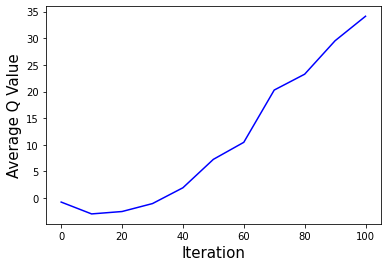

In [14]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

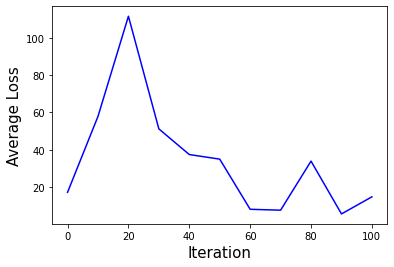

In [15]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

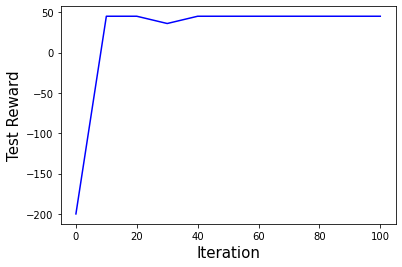

In [16]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [17]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='berrypatch-v0', render=False),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=    -1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=    -2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=    -3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=    -4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=    -5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=    45
NOTE: Reinforcement learning rlScore action complete.


,Property,Value
0,Number of State Variables,16
1,Number of Actions,4
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [18]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_State_4,_State_5,_State_6,_State_7,...,_State_9,_State_10,_State_11,_State_12,_State_13,_State_14,_State_15,_Action_,_Reward_,_Done_
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,0.0
2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,0.0
3,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,0.0
4,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
5,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.0,1.0


# Find Optimal Path

In [19]:
# Set Grid Array
states = np.array(df.iloc[:,2:18])

#Initialize Grid
grid = np.full((4, 4), "-")
grid[0,0] = "A"
grid[3,3] = "G"
grid[0,1] = "S"
grid[2,0] = "S"
grid[2,1] = "S"
grid[2,2] = "S"
grid.shape=(16)

# Mark the Agent's Path
for i in range(states.shape[0]-1):
    grid[np.argmax(states[i+1,:])] = "A"

# Print Optimal Path
grid.shape = (4,4)
print(grid)

[['A' 'S' '-' '-']
 ['A' 'A' 'A' 'A']
 ['S' 'S' 'S' 'A']
 ['-' '-' '-' 'G']]


# End the Session

In [20]:
conn.session.endSession()

+ Elapsed: 0.000539s, user: 0.00037s, sys: 0.000126s, mem: 0.203mb